# Ordinary Differential Equations

The reason we use numerical methods for solving differential equations is because it is sometimes difficult to find solutions analytically. This is useful because plenty of problems in Science can be modeled using differential equations.

Let's import some modules to handle numerical data and ploting.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Value Problem

First, we aim to solve an Initial Value Problem (IVP). That is:

$$
\begin{cases}
    \dfrac{dy}{dx} = f(x,y) \\
    y(x_0) = y_0
\end{cases}
$$

The idea is to construct $x_1, x_2,...,x_n$ equally spaced and calculate approximations to $y_i = y(x_i)$.

### Euler Method

The Euler Method (a.k.a. 1st-order Runge-Kutta) consists of approximate the next point by a line $r(x)$ passing through the current point. That is:
$$
\begin{equation}
    \begin{array}{c}
        h = x_{k+1}-x_{k} \\
        r(x) = y(x_k) + (x-x_k)y'(x_k)\\
        y_{k+1} = y_k + hf(x_k,y_k)
    \end{array}
\end{equation}
$$

**Definition**

The function *euler* takes five arguments:
* *f* is the function such that $\frac{dy}{dx} = f(x,y)$.
* $x_0$ and $y_0$ represent the initial condition.
* *h* is the step you want.
* *N* is the number os points you want to approximate.

The function returns the data points $x$ and $y$.

In [48]:
def euler(f, x0, y0, h, N):
    x = x0 + np.arange(N+1)*h
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h*f(x[n], y[n])
    return x,y

**Parameters**

In [49]:
def f(x,y):
    return y

x0 = 0
y0 = 1
h = 0.5
N = 20

**Ploting the results**

In this example, we wanted to solve $\frac{dy}{dx} = y$, whose analytic solution is $y(x) = e^x$. Below we can compare the analytic solution with the Euler method's solution.

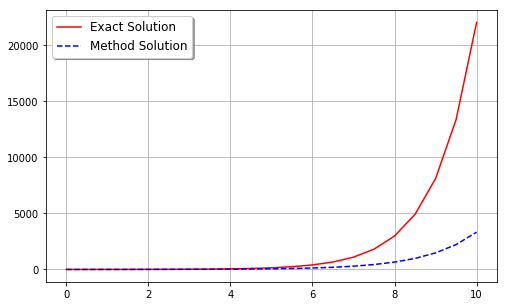

In [50]:
x, y = euler(f, x0, y0, h, N)

plt.figure(figsize=(8.09,5))
plt.plot(x,np.exp(x),'r', label="Exact Solution")
plt.plot(x,y, 'b--', label="Method Solution")
plt.grid()
plt.legend(shadow=True, fontsize=12, loc=0)

plt.show()

### Heun Method

The Heun Method (a.k.a. 2nd-order Runge Kutta) consists of

**Definition**

The function *heun* takes five arguments:
* *f* is the function such that $\frac{dy}{dx} = f(x,y)$.
* $t_0$ and $y_0$ represent the initial condition.
* *h* is the step you want.
* *N* is the number os points you want to approximate.

The function returns the data points $x$ and $y$.

In [51]:
def heun(f, x0, y0, h, N):
    x = x0 + np.arange(N+1)*h
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + (h/2.0)*( f(x[n], y[n]) + f(x[n]+h, y[n]+h*f(x[n],y[n])) )
    return x,y

**Parameters**

In [52]:
def f(x,y):
    return y

x0 = 0
y0 = 1
h = 0.5
N = 20

**Ploting results**

In this example, we wanted to solve $\frac{dy}{dx} = y$, whose analytic solution is $y(x) = e^x$. Below we can compare the analytic solution with the Heun method's solution. We can see that it is better than Euler Method because it is a 2nd-order model.

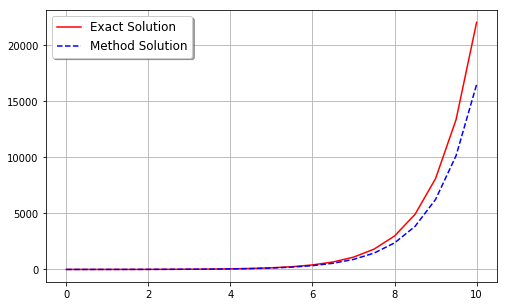

In [53]:
x, y = heun(f, x0, y0, h, N)

plt.figure(figsize=(8.09,5))
plt.plot(x,np.exp(x),'r', label="Exact Solution")
plt.plot(x,y, 'b--', label="Method Solution")
plt.grid()
plt.legend(shadow=True, fontsize=12, loc=0)

plt.show()

### Higher Order Runge-Kutta Methods

**3rd-Order Runge-Kutta Definition**

In [54]:
def rk3(f, x0, y0, h, N):
    x = x0 + np.arange(N+1)*h
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = h*f(x[n],y[n])
        k2 = h*f(x[n]+h/2.0, y[n]+k1/2.0)
        k3 = h*f(x[n]+3.0*h/4, y[n]+3.0*k2/4)
        y[n+1] = y[n] + 2.0*k1/9 + k2/3.0 + 4.0*k3/9
    return x,y

**Parameters**

In [55]:
def f(x,y):
    return y

x0 = 0
y0 = 1
h = 0.5
N = 20

**Ploting results**

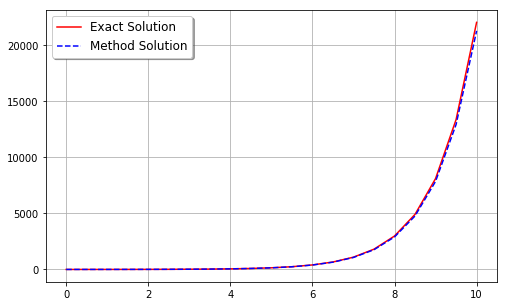

In [56]:
x, y = rk3(f, x0, y0, h, N)

plt.figure(figsize=(8.09,5))
plt.plot(x,np.exp(x),'r', label="Exact Solution")
plt.plot(x,y, 'b--', label="Method Solution")
plt.grid()
plt.legend(shadow=True, fontsize=12, loc=0)

plt.show()

**4th-Order Runge-Kutta Definition**

In [57]:
def rk4(f, x0, y0, h, N):
    x = x0 + np.arange(N+1)*h
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = h*f(x[n],y[n])
        k2 = h*f(x[n]+h/2.0, y[n]+k1/2.0)
        k3 = h*f(x[n]+h/2.0, y[n]+k2/2.0)
        k4 = h*f(x[n]+h,y[n]+k3)
        y[n+1] = y[n] + (k1+2*k2+2*k3+k4)/6.0
    return x,y

**Parameters**

In [58]:
def f(x,y):
    return y

x0 = 0
y0 = 1
h = 0.5
N = 20

**Ploting results**

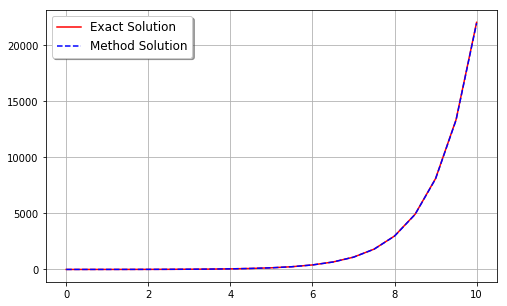

In [59]:
x, y = rk4(f, x0, y0, h, N)

plt.figure(figsize=(8.09,5))
plt.plot(x,np.exp(x),'r', label="Exact Solution")
plt.plot(x,y, 'b--', label="Method Solution")
plt.grid()
plt.legend(shadow=True, fontsize=12, loc=0)

plt.show()

## mth-order Differential Equations

It is very common to find problems in which we need to solve a mth-order equation, for instance:

$$
y^{(m)}=f(x,y,y',y'',...,y^{(m-1)})
$$

The idea is to transform a mth-order equation in a $m$ equation system, that is:

$$
\begin{cases}
    z_1 = y \\
    z_1' = y' = z_2 \\
    z_2' = y'' = z_3 \\
    ... \\
    z_{m-1}' = y^{(m-1)} = z_m \\
    z_m' = y^{(m)} = f(x,y,y',...,y^{(m-1)})
\end{cases}
$$

Now we can apply the methods above but using vectors:

$$
\begin{cases}
    \dot Y = F(x,Y) \\
    Y(x_0) = Y_0
\end{cases}
$$

Let's solve the example below:

$$
\begin{cases}
    y'' = 4y'-3y-x \\
    y(0) = 4/9 \\
    y'(0) = 7/3
\end{cases}
$$

So let's transform this 2nd-order equation into a 2 equation system:

$$
\begin{cases}
    y' = z \\
    z' = 4z-3y-x
\end{cases}
$$

So we define $Y = \begin{pmatrix} y \\ z \end{pmatrix}$, $F(x,Y) = \begin{pmatrix} z \\ 4z-3y-x \end{pmatrix}$ and $Y(0) = \begin{pmatrix} 4/9 \\ 7/3 \end{pmatrix}$, and let's use the Heun method.

## Boundary Value Problems